#  Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# План исследования


Часть 1.Просмотр общей информации и изучение данных для первой части и второй части.

Часть 2. Приоритизация гипотез.
    
    1. Применение фреймворка ICE для приоритизации гипотез.
    2. Применение фреймворка RICE для приоритизации гипотез.
    3. Сравнение методов приоритезации гипотез. Вывод.

Часть 3. Анализ A/B-теста.

    1. Построение графика кумулятивной выручки по группам. Выводы и предположения.
    2. Построение графика кумулятивного среднего чека по группам. Выводы и предположения.
    3. Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.
    4. Построение графика кумулятивной конверсии по группам. Выводы и предположения.
    5. Построение графика относительного изменения кумулятивной конверсии группы B к группе A. Выводы и предположения.
    6. Построение точечного графика количества заказов по пользователям. Выводы и предположения.
    7. 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей.
    8.Построение точечного график стоимостей заказов. Выводы и предположения.
    9. 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.
    10. Подсчет статистической значимости различий в конверсии между группами по «сырым» данным. Выводы и предположения.
    11. Подсчет статистической значимости различий в в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.
    12. Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным. Выводы и предположения.
    13. Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.
    14. Решение по результатам теста.

## Просмотр общей информации и изучение данных для первой части и второй части.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy.stats as stats

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

for df in [hypothesis, orders, visitors]: 
    display(df.head(20))
    display(df.info())
    df.isna().sum()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

### Переименование столбцов

In [2]:
hypothesis.set_axis(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], axis = 'columns', inplace = True)

orders.set_axis(['transactionid', 'visitorid', 'date', 'revenue', 'group'], axis = 'columns', inplace = True)

display(hypothesis.head(1))

display(orders.head(1))

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


### Изменение типа данных

In [3]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

### Вывод

<div style="border:solid gray 2px; padding: 20px">
В таблицах представлена информация о гипотезах и их оценке по разным параметрам;данные по посетителям и заказам.Отсутствуют пропущенные значения. Типы признаков, где были указаны даты, заменены со строчного типа на временной.В дальнейшем с этим типом данных можно будет проводить вычисления.

## Приоритизация гипотез.

### Применение фреймворка ICE для приоритизации гипотез

In [4]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

display(hypothesis.sort_values('ICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


### Применение фреймворка RICE для приоритизации гипотез

In [5]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

display(hypothesis.sort_values('RICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


### Сравнение методов приоритезации гипотез. Вывод.

<div style="border:solid gray 2px; padding: 20px">
При использовании метода ICE высокую оценку получили следующие гипотезы:  8, 0, 7, 6, 2.
При использовании метода RICE высокую оценку получили следующие гипотезы: 7, 2, 0, 6, 8.
Разница в результатах произошла из-за различии в формуле - в формуле ICE не учитывается параметр Reach. Этот фактор предназначен для оценки того, на какое количество людей изменение повлияет в течение определенного периода времени. 

##  Анализ A/B-теста.

### Собираем куммулятивные данные

In [6]:
#Создание датафрейма datesGroups с уникальными парами значений 'date' и 'group'
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])].agg({'date' : 'max', 
                                                                                                          'group' : 'max', 
                                                                                                          'transactionid' : pd.Series.nunique, 
                                                                                                          'visitorid' : pd.Series.nunique, 
                                                                                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])].agg({'date' : 'max',
                                                                                                                'group' : 'max', 
                                                                                                                'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
#Объединение таблиц
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


### Построение графика кумулятивной выручки по группам. Выводы и предположения.

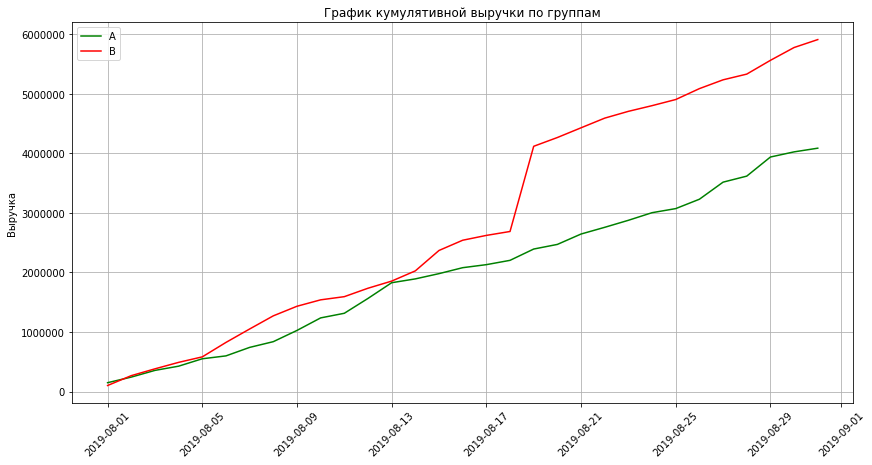

In [7]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(14,7))
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', color='green')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', color='red')
plt.grid(True)
plt.legend()

<div style="border:solid gray 2px; padding: 20px">
Выручка группы В равномерно росла до 19.08 далее наблюдается резкий рост, это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Нужно проанализировать выброс. 
Выручка группы А равномерно растет на протяжении всего теста.
Выручка по группе Б в течение всего теста больше чем у группы А. 

### Построение графика кумулятивного среднего чека по группам. Выводы и предположения.

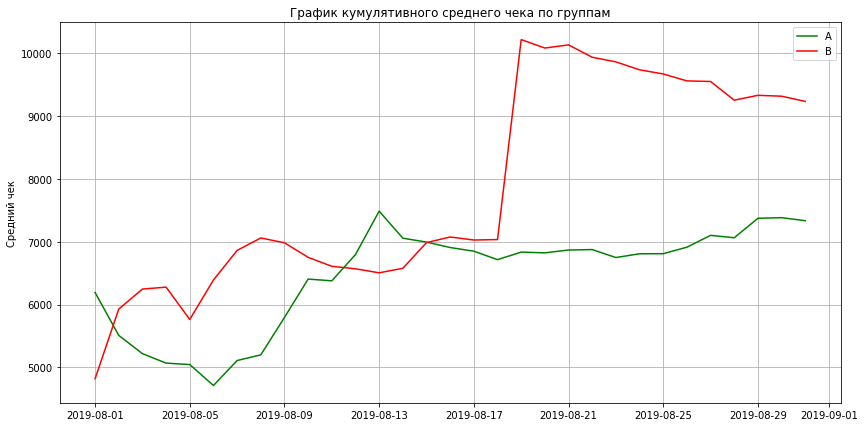

In [8]:
plt.figure(figsize=(14,7))
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Средний чек")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', color='green')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B', color='red')
plt.grid(True)
plt.legend()

<div style="border:solid gray 2px; padding: 20px">
Кумулятивное значение среднего чека в начале теста по обеим группам колеблется.
На графике виден аномальный резкий рост среднего чека по группе B 18-19 августа 2019г после которого идёт спад показателя среднего чека. 
По группе А после 13 августа показатель среднего чека становится равномерным.
Кумулятивное значение среднего чека после середины теста по группе Б больше чем у группы А. 

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.

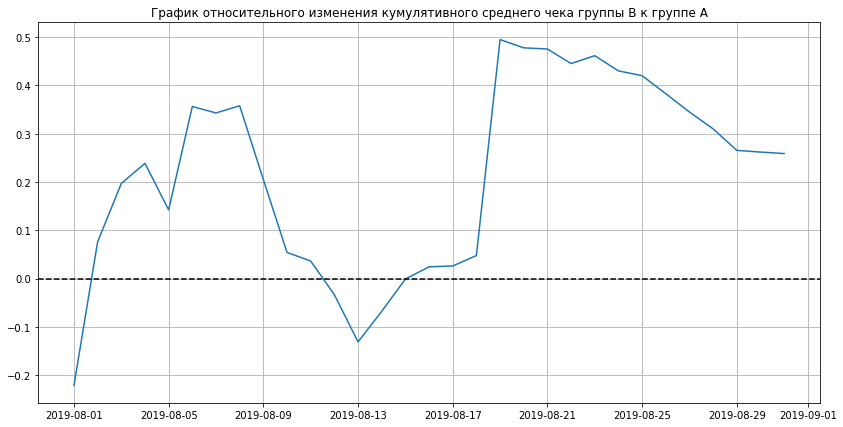

In [9]:
#Объединие таблиц cumulativeRevenueA и cumulativeRevenueB методом merge()
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(14,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')

<div style="border:solid gray 2px; padding: 20px">
    
Резкие значительные изменения в течение теста указывают на наличие аномальных заказов. В дальнейшем необходимо будет проверить данные. 

### Построение графика кумулятивной конверсии по группам. Выводы и предположения.

['2019-08-01', '2019-09-01', 0, 0.05]

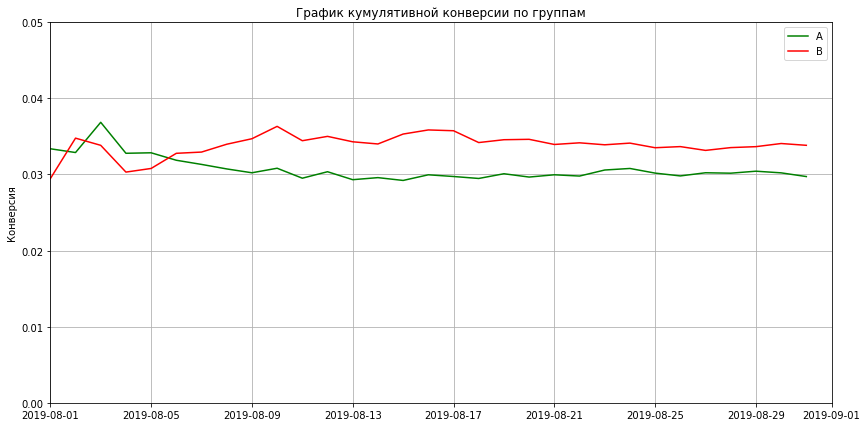

In [10]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(14,7))
plt.title('График кумулятивной конверсии по группам')
plt.ylabel('Конверсия')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', color='green')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', color='red')
plt.grid(True)
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0, 0.05])

<div style="border:solid gray 2px; padding: 20px">
    
В начале теста были колебания, но постепенно сегмент В вырвался вперед и зафиксировался. Благодаря изменению масштаба графика стало видно, что конверсия установилась около своего среднего значения.

### Построение графика относительного изменения кумулятивной конверсии группы B к группе A. Выводы и предположения.

['2019-08-01', '2019-09-01', -0.5, 0.5]

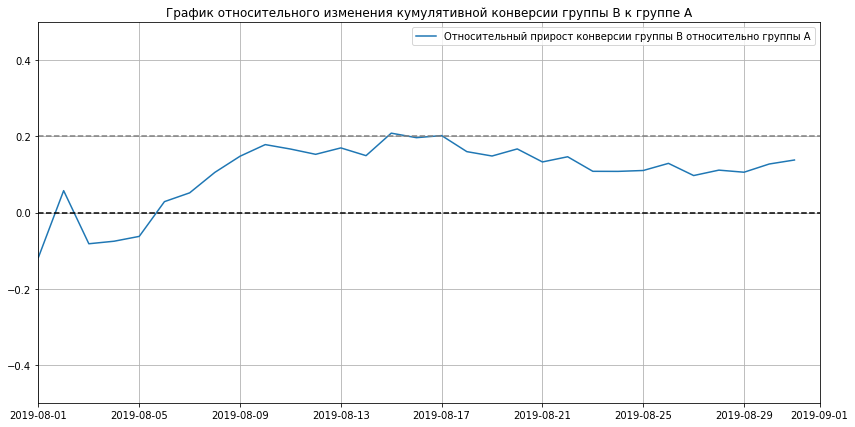

In [11]:
#Объединение таблиц cumulativeDataA и cumulativeDataB методом merge()
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(14,7))
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.grid(True)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5])

<div style="border:solid gray 2px; padding: 20px">
    
Конверсия в группе В начала стремительный рост после 05.08, прирост составил 20%, затем конверсия начала падать. 

### Построение точечного графика количества заказов по пользователям. Выводы и предположения.

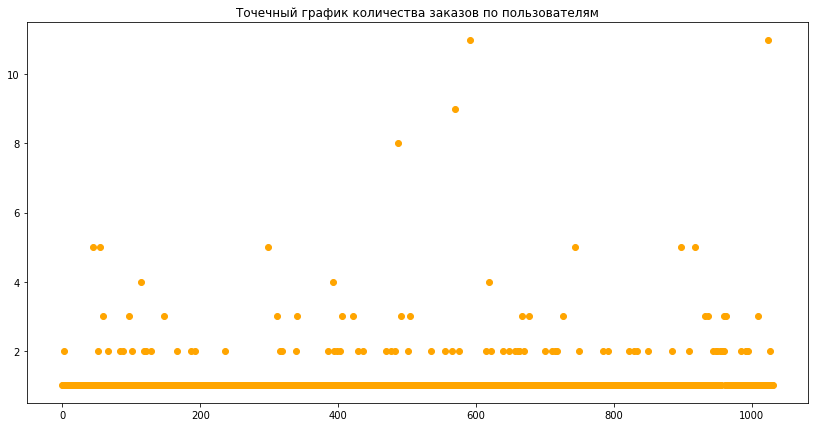

In [12]:
orders_by_users = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})

orders_by_users.columns = ['visitorid','orders']

x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(14,7))
plt.title('Точечный график количества заказов по пользователям')
plt.scatter(x_values, orders_by_users['orders'], color='orange')

<div style="border:solid gray 2px; padding: 20px">
    
По графику видно, что пользователи редко совершают более двух заказов. Есть совсем аномальные показатели. 

### 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей.

In [13]:
print('95 перцентиль: %.2f' % (np.percentile(orders_by_users['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders_by_users['orders'], [99])))

95 перцентиль: 2.00
99 перцентиль: 4.00


<div style="border:solid gray 2px; padding: 20px">
    
Не более 5% пользователей оформляли более 2-х заказов и не более 1% - 4 заказа. Примем 4 заказа на одного пользователя за нижнюю границу числа заказов, и в дальнейшем отсеем по ней аномальных пользователей.

### Построение точечного график стоимостей заказов. Выводы и предположения.

[0, 1200, 0, 175000]

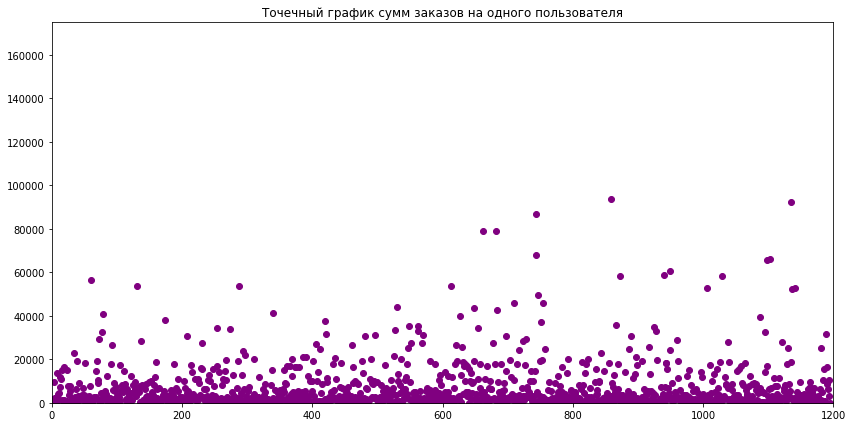

In [14]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(14,7))
plt.title('Точечный график сумм заказов на одного пользователя')
plt.scatter(x_values, orders['revenue'],color='purple')
plt.axis([0, 1200, 0, 175000])

<div style="border:solid gray 2px; padding: 20px">
    
В основном пользователи совершают заказы на суммы в пределах 25000 р. Если убрать лимит по осям, то будет виден аномальный заказ на стоимость свыше 1200000. 

### 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.

In [15]:
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

95 перцентиль: 28000.00
99 перцентиль: 58233.20


<div style="border:solid gray 2px; padding: 20px">
    
Не более 5% пользователей оформляли заказ на сумму свыше 28000 р. и не более 1% - на сумму более 58233. Примем за границу для определения аномальных заказов заказы свыше 28000.

### Подсчет статистической значимости различий в конверсии между группами по «сырым» данным. Выводы и предположения.

In [16]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']



visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max',
                                                                                                               'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max',
                                                                                                               'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']


ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']


ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']


#Количество заказов для пользователей из разных групп 
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders']

#Объединим таблицы
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')


#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

#Применим тест Манна-Уитни
print("p-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

p-value: 0.00840
0.138


<div style="border:solid gray 2px; padding: 20px">
    
Р-value равен 0.00840, что меньше 0.05 (критического уровня статистической значимости), поэтому нулевую гипотезу отвергаем. "Анализ сырых данных" сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А равен 13.8%. 

### Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.

In [17]:
print("p-value {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value 0.365
0.259


<div style="border:solid gray 2px; padding: 20px">
    
Р-value равен 0.365, что больше 0.05,поэтому не получилось отвергнуть H0: вывод о различии сделать нельзя. Средний чек группы B  выше среднего чека группы A на 25%. 

### Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным. Выводы и предположения.

In [18]:
#Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 58 000 рублей.

#Посчитаем количество аномальных пользователей:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorid'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Кол-во аномальных пользователей: {}'.format(len(abnormalUsers)))

Кол-во аномальных пользователей: 59


In [19]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)


print("p-value {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value 0.009
0.145


<div style="border:solid gray 2px; padding: 20px">
    
Результаты по конверсии по очищенным данным практически не изменились. Как и в случае с сырыми данными статистическая значимость достигнута. 

### Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.

In [20]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.481
-0.014


<div style="border:solid gray 2px; padding: 20px">
    
Статистическая значимость различия среднего чека заказов между группами так и не появилась. По очищенным данным группа B стала хуже чем группа А на 1% (по сырым данным была лучше на 25%). Выбросы сильно смещали среднюю оценку.  

## Решение по результатам теста.

<div style="border:solid gray 2px; padding: 20px">
 
Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.Причем по очищенным данным показатель конверсии стал выше (с 13.8% до 14.5%).Также график различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
    
График различия среднего чека колеблется. После удаления аномальных значений разница между средними чеками стала минимальна.
    
Исходя из этих данных можно принять решение об остановке проводимого А/В теста и зафиксировать победу группы В. 